In [ ]:
#load dependencies / mount drive

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import random
import shutil
import time
import glob
import csv 

from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from pathlib import Path

%tensorflow_version 2.x
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')
%cd /content/
%mkdir training

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content


In [ ]:
# CSV VERSION TO LOAD
version = "[v4-0001]-"


# CHANGE THIS TO REFLECT PATH TO "Waymo" Directory

colab_root = "/content/drive/My Drive"
local_csv_loc = "/content/training/"

In [ ]:
# USE PRE-COMPILED IMAGES / CSV

# UNCOMMENT TO RUN

%cd /content/
%cp "/content/drive/My Drive/Waymo/training.zip" training.zip            # THE ZIP FILE IS IN THE WAYMO SHARED FOLDER AS training.zip
!unzip -q training.zip                                                   # unzip contents of training.zip to /content/training

/content


### Next Cell is to copy all CSV files from Drive to Local Instance
### DO NOT RUN THIS IF YOU ARE USING THE CELL ABOVE FOR PRE-EXTRACTED DATA

In [ ]:
#COPY ALL csv files to local runtime

%cd {colab_root}/Waymo/training/
folders = glob.glob("*")
folders.sort()

fold_count = 1

img_list = set()

# Iterate through folders
for folder in folders:
  %cd {folder}
  
  # grab correct version of csv file from cell 2
  folder = version+folder

  print('|--- + ' + str(folder) + " -{ " + str(fold_count) + " of " + str(len(folders)) + " }-")
  
  %cp {folder}.csv {local_csv_loc}{folder}.csv

  fold_count+= 1
  
  %cd {colab_root}/Waymo/training/ 
  
  # Change fold_count to however many CSV (TAR) Files to use.
  # if fold_count == 4:
  #   break

/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0000
|--- + [v4-0001]-training_0000 -{ 1 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0001
|--- + [v4-0001]-training_0001 -{ 2 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0002
|--- + [v4-0001]-training_0002 -{ 3 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0003
|--- + [v4-0001]-training_0003 -{ 4 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0004
|--- + [v4-0001]-training_0004 -{ 5 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0005
|--- + [v4-0001]-training_0005 -{ 6 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0006
|--- + [v4-0001]-training_0006 -{ 7 of 32 }-
/content/drive/My Drive/Waymo/training
/c

### PROCESS CSV FILE ONLY to create all_data variable used for train_test splits

In [ ]:
# READ ALL CSV FILES AND CORRECT IMAGE LOCATION

all_csv_files = glob.glob(os.path.join(local_csv_loc,"*.csv"))

all_csv_files.sort()

np_array_list = []
for file_ in all_csv_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    np_array_list.append(df.to_numpy())

comb_np_array = np.vstack(np_array_list)

all_data = pd.DataFrame(comb_np_array)

# Correct location of image based on local runtime & Data Extraction screwups
all_data[29] = all_data[29].apply(lambda x: str(colab_root) + str(x))
all_data[29] = all_data[29].apply(lambda x: x.replace('labels.tfrecord/','labels/'))

all_data.columns = ['frame-num', 'pose-timestamp', 'f_cam-obj-dist-ped', 'f_cam-obj-dist-cyc', 'f_cam-obj-dist-veh', 'f_cam-obj-dist-sig', 
                    'fl_cam-obj-dist-ped', 'fl_cam-obj-dist-cyc', 'fl_cam-obj-dist-veh', 'fl_cam-obj-dist-sig', 
                    'fr_cam-obj-dist-ped', 'fr_cam-obj-dist-cyc', 'fr_cam-obj-dist-veh', 'fr_cam-obj-dist-sig', 
                    'accel_x', 'accel_y', 'accel_z', 'v_x', 'v_y' , 'v_z', 'w_x','w_y','w_z', 
                    'lag_vx', 'lag_vy', 'lag_vz', 'lag_accel_x', 'lag_accel_y', 'lag_accel_z', 'path']







# Set Column Names
#big_frame.columns = ["col1","col2"....]

# cleanup
del(comb_np_array)
del(np_array_list)

# Show data

all_data

,frame-num,pose-timestamp,f_cam-obj-dist-ped,f_cam-obj-dist-cyc,f_cam-obj-dist-veh,f_cam-obj-dist-sig,fl_cam-obj-dist-ped,fl_cam-obj-dist-cyc,fl_cam-obj-dist-veh,fl_cam-obj-dist-sig,fr_cam-obj-dist-ped,fr_cam-obj-dist-cyc,fr_cam-obj-dist-veh,fr_cam-obj-dist-sig,accel_x,accel_y,accel_z,v_x,v_y,v_z,w_x,w_y,w_z,lag_vx,lag_vy,lag_vz,lag_accel_x,lag_accel_y,lag_accel_z,path
0,1,1.51166e+09,-1,-1,0.686762,0.597874,-1,-1,0.68632,0.59698,-1,-1,0.687003,0.59875,-3.17279,0.32874,0.568134,-0.0794682,-0.00898567,0.0726383,0.0165402,0.0504665,0.00213652,0.237812,-0.0418599,0.0158245,0,0,0,/content/drive/My Drive/Waymo/training/trainin...
1,2,1.51166e+09,-1,-1,0.686756,0.597882,-1,-1,0.686314,0.596988,-1,-1,0.686997,0.598758,-0.91684,0.375583,-0.396345,-0.171153,0.0285728,0.0330036,-0.00912002,0.0203242,0.00450624,-0.0794682,-0.00898567,0.0726383,-3.17279,0.32874,0.568134,/content/drive/My Drive/Waymo/training/trainin...
2,3,1.51166e+09,-1,-1,0.686733,0.597893,-1,-1,0.686291,0.596999,-1,-1,0.686974,0.598768,1.42116,-0.188135,-1.13001,-0.0290362,0.00975918,-0.079998,-0.013404,-0.0547361,-0.00320912,-0.171153,0.0285728,0.0330036,-0.91684,0.375583,-0.396345,/content/drive/My Drive/Waymo/training/trainin...
3,4,1.51166e+09,-1,-1,0.686719,0.597904,-1,-1,0.686276,0.597009,-1,-1,0.68696,0.598778,0.816499,-0.250213,-0.0414343,0.0526131,-0.0152619,-0.0841414,-0.0113267,-0.0573463,-0.00356794,-0.0290362,0.00975918,-0.079998,1.42116,-0.188135,-1.13001,/content/drive/My Drive/Waymo/training/trainin...
4,5,1.51166e+09,-1,-1,0.686696,0.597851,-1,-1,0.686254,0.596956,-1,-1,0.686938,0.598726,-0.756806,0.236532,0.996184,-0.0230651,0.00839055,0.0154738,-0.00794468,0.00929414,5.9695e-05,0.0526131,-0.0152619,-0.0841414,0.816499,-0.250213,-0.0414343,/content/drive/My Drive/Waymo/training/trainin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66454,108,1.50713e+09,0.40513,-1,0.373706,0.507745,0.405103,-1,0.372728,0.50792,0.405109,-1,0.37346,0.507659,0.220863,-0.0988849,-0.0379876,-5.29414,4.03099,-0.0337654,0.0187669,0.0120172,-0.0127253,-5.31623,4.04088,-0.0299665,0.257723,-0.147095,0.1487,/content/drive/My Drive/Waymo/training/trainin...
66455,109,1.50713e+09,0.405265,-1,0.408272,0.445066,0.405251,-1,0.407521,0.445447,0.40525,-1,0.407889,0.444855,0.221601,-0.104473,-0.174176,-5.27198,4.02054,-0.0511833,0.0105199,0.00371761,-0.00789598,-5.29414,4.03099,-0.0337654,0.220863,-0.0988849,-0.0379876,/content/drive/My Drive/Waymo/training/trainin...
66456,110,1.50713e+09,0.405291,-1,0.414416,0.507343,0.40529,-1,0.413666,0.507534,0.405278,-1,0.414072,0.50725,0.129306,-0.0296492,-0.144632,-5.25905,4.01758,-0.0656467,-0.00270076,-0.0115416,-0.000441346,-5.27198,4.02054,-0.0511833,0.221601,-0.104473,-0.174176,/content/drive/My Drive/Waymo/training/trainin...
66457,111,1.50713e+09,0.405228,-1,0.391774,0.507117,0.405239,-1,0.390804,0.507317,0.405214,-1,0.391625,0.507021,0.169369,-0.107534,0.0721754,-5.24212,4.00682,-0.0584291,0.0011525,-0.0126096,-0.0147217,-5.25905,4.01758,-0.0656467,0.129306,-0.0296492,-0.144632,/content/drive/My Drive/Waymo/training/trainin...


In [ ]:
# CREATE TRAIN VAL TEST SETS

split_1, val_set = train_test_split(all_data, test_size=0.3, shuffle=False)

train_set, test_set = train_test_split(split_1, test_size=0.1, shuffle=False) 

#del(all_data)
del(split_1)

print("Length of train, val, test sets: ", len(train_set), len(val_set), len(test_set))

Length of train, val, test sets:  41868 19938 4653


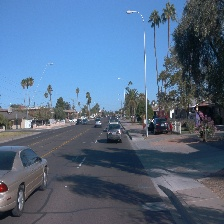

Path: /content/drive/My Drive/Waymo/training/training_0008/segment-14561791273891593514_2558_030_2578_030_with_camera_labels/segment-14561791273891593514_2558_030_2578_030_with_camera_labels.tfrecord--79.jpg


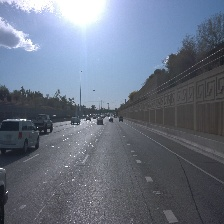

Path: /content/drive/My Drive/Waymo/training/training_0001/segment-10770759614217273359_1465_000_1485_000_with_camera_labels/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord--196.jpg


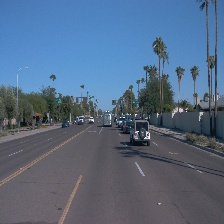

Path: /content/drive/My Drive/Waymo/training/training_0006/segment-1352150727715827110_3710_250_3730_250_with_camera_labels/segment-1352150727715827110_3710_250_3730_250_with_camera_labels.tfrecord--186.jpg
Length of TRAIN set: 44991


In [ ]:
#check TRAIN set
import IPython.display as display

for n in range(3):
  x = train_set.sample(axis=0)
  image_path = x.iloc[0,29]
  display.display(display.Image(image_path))
  print("Path: " + str(x.iloc[0,29]))
print("Length of TRAIN set: " + str(len(train_set)))

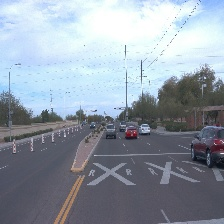

Path: /content/drive/My Drive/Waymo/training/training_0011/segment-16191439239940794174_2245_000_2265_000_with_camera_labels/segment-16191439239940794174_2245_000_2265_000_with_camera_labels.tfrecord--109.jpg


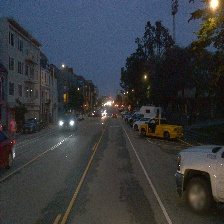

Path: /content/drive/My Drive/Waymo/training/training_0011/segment-16080705915014211452_620_000_640_000_with_camera_labels/segment-16080705915014211452_620_000_640_000_with_camera_labels.tfrecord--146.jpg


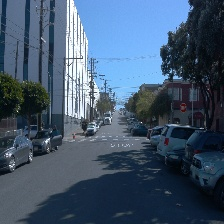

Path: /content/drive/My Drive/Waymo/training/training_0011/segment-16087604685956889409_40_000_60_000_with_camera_labels/segment-16087604685956889409_40_000_60_000_with_camera_labels.tfrecord--35.jpg
Length of VAL set: 21425


In [ ]:
#check VAL set
import IPython.display as display

for n in range(3):
  x = val_set.sample(axis=0)
  image_path = x.iloc[0,29]
  display.display(display.Image(image_path))
  print("Path: " + str(x.iloc[0,29]))
print("Length of VAL set: " + str(len(val_set)))

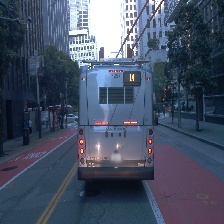

Path: /content/drive/My Drive/Waymo/training/training_0010/segment-15482064737890453610_5180_000_5200_000_with_camera_labels/segment-15482064737890453610_5180_000_5200_000_with_camera_labels.tfrecord--110.jpg


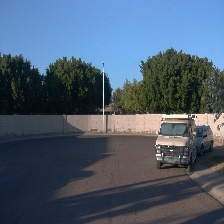

Path: /content/drive/My Drive/Waymo/training/training_0010/segment-15717839202171538526_1124_920_1144_920_with_camera_labels/segment-15717839202171538526_1124_920_1144_920_with_camera_labels.tfrecord--164.jpg


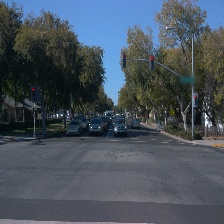

Path: /content/drive/My Drive/Waymo/training/training_0010/segment-15696964848687303249_4615_200_4635_200_with_camera_labels/segment-15696964848687303249_4615_200_4635_200_with_camera_labels.tfrecord--133.jpg
Length of TEST set: 4999


In [ ]:
#check TEST set
import IPython.display as display

for n in range(3):
  x = test_set.sample(axis=0)
  image_path = x.iloc[0,29]
  display.display(display.Image(image_path))
  print("Path: " + str(x.iloc[0,29]))
print("Length of TEST set: " + str(len(test_set)))

#BEGIN IMAGE PROCESSING

1. These cells will use ResNet50 to obtain activations
2. These activations will be saved to disk

In [ ]:
# A method to load an image off disk, and extract activations using 
# Above Model

def image_to_activations(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (224, 224))
  activations = tf.keras.applications.resnet50.preprocess_input(img)
  return activations, image_path

In [ ]:
# Extract activations for every image in train, validation, test sets.
# First, create a set of the absolute paths to all of these images (image_path_set).
# Populate this with the absolute paths to all these images.

image_path_set = set()

for x in train_set.itertuples():
  image_path_set.add(x[30])

for x in val_set.itertuples():
  image_path_set.add(x[30])

for x in test_set.itertuples():
  image_path_set.add(x[30])

print("Images to preprocess", len(image_path_set))

Images to preprocess 66459


In [ ]:
# Create a feature extraction model for IMAGES.

image_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [ ]:
# This cell will extract activations for each image and save them to disk 
# in NumPy format.
# Create a dataset to load each image off disk, and extract activations
counter = 0

activation_dataset = tf.data.Dataset.from_tensor_slices(list(image_path_set))
activation_dataset = activation_dataset.map(image_to_activations, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

# Save all activations to disk in NumPy format
for img_batch, path_batch in activation_dataset:
  batch_features = image_features_extract_model(img_batch)
  counter +=1

  if counter % 64 == 0:
    print("Currently in : " + str(counter))
  for bf, p in zip(batch_features, path_batch):
    path_of_feature = p.numpy().decode("utf-8")
    #print(path_of_feature)
    path_of_feature = path_of_feature.replace('/content/drive/My Drive/Waymo/training/', '/content/training/')
    path = Path(path_of_feature)
    try:
      if not path.parent.exists():
          path.parent.mkdir(parents=True)
    except OSError:
      pass
    np.save(path_of_feature, bf.numpy())

Currently in : 64
Currently in : 128
Currently in : 192
Currently in : 256
Currently in : 320
Currently in : 384
Currently in : 448
Currently in : 512
Currently in : 576
Currently in : 640
Currently in : 704
Currently in : 768
Currently in : 832
Currently in : 896
Currently in : 960
Currently in : 1024
Currently in : 1088
Currently in : 1152
Currently in : 1216
Currently in : 1280
Currently in : 1344
Currently in : 1408
Currently in : 1472
Currently in : 1536
Currently in : 1600
Currently in : 1664
Currently in : 1728
Currently in : 1792
Currently in : 1856
Currently in : 1920
Currently in : 1984
Currently in : 2048


In [ ]:
%cd /content/training/

!ls

!rm -rf training_0014/ 

!ls

/content/training
 training_0000	 training_0011		       '[v4-0001]-training_0005.csv'
 training_0001	 training_0012		       '[v4-0001]-training_0006.csv'
 training_0002	 training_0013		       '[v4-0001]-training_0007.csv'
 training_0003	 training_0014		       '[v4-0001]-training_0008.csv'
 training_0004	 training_0016		       '[v4-0001]-training_0010.csv'
 training_0005	'[v4-0001]-training_0000.csv'  '[v4-0001]-training_0011.csv'
 training_0006	'[v4-0001]-training_0001.csv'  '[v4-0001]-training_0012.csv'
 training_0007	'[v4-0001]-training_0002.csv'  '[v4-0001]-training_0013.csv'
 training_0008	'[v4-0001]-training_0003.csv'  '[v4-0001]-training_0016.csv'
 training_0010	'[v4-0001]-training_0004.csv'
 training_0000	 training_0011		       '[v4-0001]-training_0006.csv'
 training_0001	 training_0012		       '[v4-0001]-training_0007.csv'
 training_0002	 training_0013		       '[v4-0001]-training_0008.csv'
 training_0003	 training_0016		       '[v4-0001]-training_0010.csv'
 training_0004	'[v4-0

In [ ]:
# ZIP CONTENTS OF ACTIVATIONS / CSV
# UNCOMMENT TO USE

%cd /content/
!zip -r training.zip training

%cp training.zip "/content/drive/My Drive/Waymo/training.zip"

Streaming output truncated to the last 5000 lines.
  adding: training/training_0006/segment-1382515516588059826_780_000_800_000_with_camera_labels/segment-1382515516588059826_780_000_800_000_with_camera_labels.tfrecord--158.jpg.npy (deflated 78%)
  adding: training/training_0006/segment-1382515516588059826_780_000_800_000_with_camera_labels/segment-1382515516588059826_780_000_800_000_with_camera_labels.tfrecord--130.jpg.npy (deflated 77%)
  adding: training/training_0006/segment-1382515516588059826_780_000_800_000_with_camera_labels/segment-1382515516588059826_780_000_800_000_with_camera_labels.tfrecord--10.jpg.npy (deflated 76%)
  adding: training/training_0006/segment-1382515516588059826_780_000_800_000_with_camera_labels/segment-1382515516588059826_780_000_800_000_with_camera_labels.tfrecord--38.jpg.npy (deflated 75%)
  adding: training/training_0006/segment-1382515516588059826_780_000_800_000_with_camera_labels/segment-1382515516588059826_780_000_800_000_with_camera_labels.tfrecord

# BEGIN FINALIZING TRAIN VAL AND TEST DATASETS

     frame-num pose-timestamp f_cam-obj-dist-ped f_cam-obj-dist-cyc  \
3382         7    1.55432e+09                  0                 -1   

     f_cam-obj-dist-veh f_cam-obj-dist-sig fl_cam-obj-dist-ped  \
3382           0.504139           0.602943                   0   

     fl_cam-obj-dist-cyc fl_cam-obj-dist-veh fl_cam-obj-dist-sig  \
3382                  -1               0.503            0.602749   

     fr_cam-obj-dist-ped fr_cam-obj-dist-cyc  ...       v_y      v_z  \
3382                   0                  -1  ... -0.803949  0.12496   

            w_x         w_y        w_z   lag_vx    lag_vy   lag_vz  \
3382 -0.0138891  0.00101514  0.0045587 -5.34166 -0.800714  0.11423   

     lag_accel_x lag_accel_y lag_accel_z  \
3382   -0.140051    0.182105  -0.0679921   

                                                   path  
3382  /content/drive/My Drive/Waymo/training/trainin...  

[1 rows x 30 columns]
Length of input, output, img_path, img_activations :  6114 6114 6114 6114

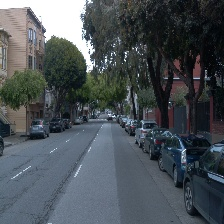

Input : (7, 1554316192.7432268, 0.0, -1.0, 0.5041385575559151, 0.6029431715777795, 0.0, -1.0, 0.5029998598952427, 0.6027487742636969, 0.0, -1.0, 0.5042217619391267, 0.6014978069666533, -5.339541435241699, -0.8039485812187195, 0.12496035546064375, -0.013889065012335777, 0.001015143934637308, 0.004558699671179056, -5.341660976409912, -0.8007137179374695, 0.11422991752624513, -0.14005097357623267, 0.18210477001094336, -0.06799208693641177) Output : (0.021195532963941367, -0.032348817913920865) IMG Path : /content/drive/My Drive/Waymo/training/training_0000/segment-14233522945839943589_100_000_120_000_with_camera_labels/segment-14233522945839943589_100_000_120_000_with_camera_labels.tfrecord--7.jpg IMG ACT : /content/training/training_0000/segment-14233522945839943589_100_000_120_000_with_camera_labels/segment-14233522945839943589_100_000_120_000_with_camera_labels.tfrecord--7.jpg


In [ ]:
# Set Up Train Dataset

i = random.randint(0,len(train_set)-1)
pd.options.display.max_columns = 25

print(train_set.loc[[i]])

train_output = train_set[['accel_x' , 'accel_y']]
train_set = train_set.drop(['accel_x' , 'accel_y', 'accel_z'], axis = 1)

train_out = [] 
train_input = []
train_images_act = []
train_images_img = []



for x in train_set.itertuples():
  train_input.append(x[1:27])
  train_images_img.append(x[27])
  train_images_act.append(x[27].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in train_output.itertuples():
  train_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(train_input), len(train_out), len(train_images_act), len(train_images_img))

#SANITY CHECK

image_path = train_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(train_input[i]) + 
      " Output : " + str(train_out[i]) +
      " IMG Path : " + str(train_images_img[i]) +
      " IMG ACT : " + str(train_images_act[i]))


Length of input, output, img_path, img_activations :  2912 2912 2912 2912


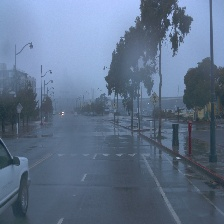

Input : (163, 1543361395.8785846, 0.0, -1.0, 0.4927601024531968, 0.3819069662336072, 0.0, -1.0, 0.4927751226086109, 0.3823713089826293, 0.0, -1.0, 0.4920795812658589, 0.38239118848620207, -0.8400685787200928, 10.35585117340088, -0.04627886414527893, 0.022669905796647072, 0.033900689333677285, 0.011288752779364586, -0.831455647945404, 10.3602933883667, -0.054292943328619, -0.1872568023804755, 0.02847796438823877, 0.2428681776510925) Output : (-0.08613247022638676, -0.044423780742224285) IMG Path : /content/drive/My Drive/Waymo/training/training_0002/segment-11219370372259322863_5320_000_5340_000_with_camera_labels/segment-11219370372259322863_5320_000_5340_000_with_camera_labels.tfrecord--163.jpg IMG ACT : /content/training/training_0002/segment-11219370372259322863_5320_000_5340_000_with_camera_labels/segment-11219370372259322863_5320_000_5340_000_with_camera_labels.tfrecord--163.jpg


In [ ]:
# Set Up VAL Dataset

val_output = val_set[['accel_x' , 'accel_y']]
val_set = val_set.drop(['accel_x' , 'accel_y', 'accel_z'], axis = 1)

val_out = []
val_input = []
val_images_act = []
val_images_img = []

for x in val_set.itertuples():
  val_input.append(x[1:27])
  val_images_img.append(x[27])
  val_images_act.append(x[27].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in val_output.itertuples():
  val_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(val_input), len(val_out), len(val_images_act), len(val_images_img))

#SANITY CHECK

i = random.randint(0,len(val_input)-1)

image_path = val_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(val_input[i]) + 
      " Output : " + str(val_out[i]) +
      " IMG Path : " + str(val_images_img[i]) +
      " IMG ACT : " + str(val_images_act[i]))

Length of input, output, img_path, img_activations :  680 680 680 680


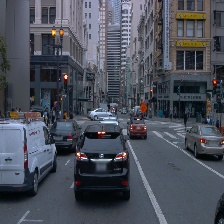

Input : (90, 1557159303.9926426, 0.4833368749013132, -1.0, 0.401101828972488, 0.5570328442209911, 0.4851839923420128, -1.0, 0.4007362197487061, 0.5577294045948977, 0.4834038539779056, -1.0, 0.40161484976636347, 0.5564910150262227, 0.0, 0.0, 0.0, 0.0010106014087796213, -0.0010406055953353646, 0.0009300179081037641, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) Output : (0.0, 0.0) IMG Path : /content/drive/My Drive/Waymo/training/training_0002/segment-11070802577416161387_740_000_760_000_with_camera_labels/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord--90.jpg IMG ACT : /content/training/training_0002/segment-11070802577416161387_740_000_760_000_with_camera_labels/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord--90.jpg


In [ ]:
# Set Up TEST Dataset

test_output = test_set[['accel_x' , 'accel_y']]
test_set = test_set.drop(['accel_x' , 'accel_y', 'accel_z' ], axis = 1)

test_out = []
test_input = []
test_images_act = []
test_images_img = []

for x in test_set.itertuples():
  test_input.append(x[1:27])
  test_images_img.append(x[27])
  test_images_act.append(x[27].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in test_output.itertuples():
  test_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(test_input), len(test_out), len(test_images_act), len(test_images_img))

#SANITY CHECK

i = random.randint(0,len(test_input)-1)

image_path = test_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(test_input[i]) + 
      " Output : " + str(test_out[i]) +
      " IMG Path : " + str(test_images_img[i]) +
      " IMG ACT : " + str(test_images_act[i]))

In [ ]:
# MEMORY CLEANUP

del(test_output)
del(val_output)
del(train_output)
#del(test_set)

### Convert Dataset to tf.dataset for use in model

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

def load_np(img_path, inputs, outputs):
  activations = np.load(img_path.decode('utf-8')+'.npy')
  return activations, inputs, outputs, img_path

# This method will create a dataset that returns four elements.
# - a batch of activations (loaded from disk)
# - a batch of padded questions
# - a batch of numeric answers
# - a batch of absolute paths to the corresponding images
def create_dataset(images, inputs, outputs):
  dataset = tf.data.Dataset.from_tensor_slices((images, 
                                                inputs, 
                                                outputs))
  # TODO jbgordon@: rewrite this to be clearer
  # Load the cached activations off disk
  dataset = dataset.map(lambda x, y, z: tf.numpy_function(
      load_np, [x, y, z], [tf.float32, tf.float32, tf.float32, tf.string]),
      num_parallel_calls=tf.data.experimental.AUTOTUNE)
  
  # Shuffle and batch
  dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
  dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return dataset


In [ ]:
# Create TF Dataset for pipeline

train_ds = create_dataset(train_images_act, train_input, train_out)
val_ds = create_dataset(val_images_act, val_input, val_out)
test_ds = create_dataset(test_images_act, test_input, test_out)

In [ ]:
# Verify your datasets are working properly

# Here is code you can use to quickly retrieve a batch of data

my_iterator = iter(train_ds)
activations_batch, input_batch, output_batch, paths_batch = next(my_iterator)

print("TRAIN SET")
print(activations_batch.shape,
      input_batch.shape, 
      output_batch.shape, 
      paths_batch.shape)

my_iterator = iter(val_ds)
activations_batch, input_batch, output_batch, paths_batch = next(my_iterator)

print("VAL SET")
print(activations_batch.shape,
      input_batch.shape, 
      output_batch.shape, 
      paths_batch.shape)

my_iterator = iter(test_ds)
activations_batch, input_batch, output_batch, paths_batch = next(my_iterator)

print("TEST SET")
print(activations_batch.shape,
      input_batch.shape, 
      output_batch.shape, 
      paths_batch.shape)


TRAIN SET
(64, 7, 7, 2048) (64, 26) (64, 2) (64,)
VAL SET
(64, 7, 7, 2048) (64, 26) (64, 2) (64,)
TEST SET
(64, 7, 7, 2048) (64, 26) (64, 2) (64,)


### FULL MODEL

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout
from tensorflow.keras.models import Model, Sequential

In [ ]:
image_input = Input(shape=(7, 7, 2048))
vision_model = Sequential()
vision_model.add(tf.keras.layers.GlobalAveragePooling2D())

encoded_image = vision_model(image_input) 

main_input = Input(shape=(26,))

output_1 = Dense(128,activation='relu')(main_input)
output_2 = Dense(64,activation='relu')(output_1)
encoded_input = Dense(32,activation='relu')(output_2)

merged = tf.keras.layers.concatenate([encoded_image, encoded_input])


dense_1 = Dense(128,activation='relu')(merged)
dense_2 = Dropout(0.2)(dense_1)
dense_3 = Dense(32,activation='relu')(dense_2)
output = Dense(2)(dense_3)

model = Model(inputs=[image_input, main_input], outputs=output)

In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 64, 26)]     0                                            
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 10)           1480        input_27[0][0]                   
__________________________________________________________________________________________________
dense_103 (Dense)               (None, 128)          1408        lstm_9[0][0]                     
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 7, 7, 2048)] 0                                            
____________________________________________________________________________________________

In [ ]:
from tensorflow.keras import optimizers, metrics, losses

opt = optimizers.Adam()

model.compile(optimizer=opt, loss='mean_squared_error', metrics=['Accuracy'])


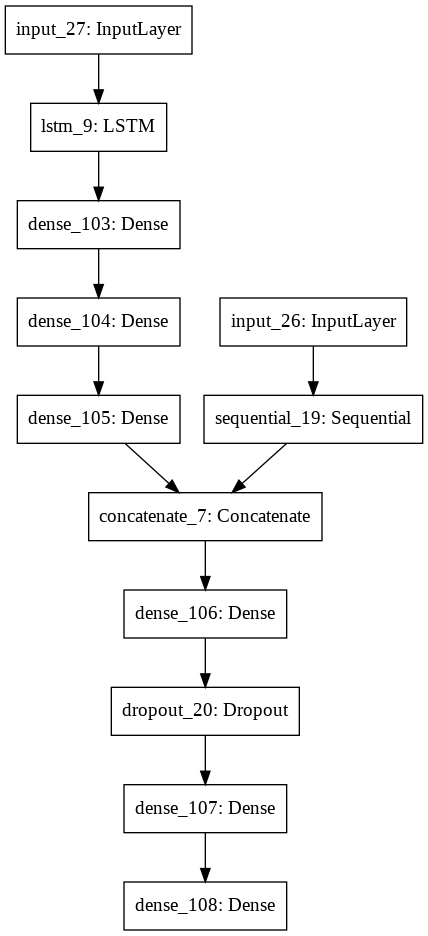

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
activations_batch, input_batch, output_batch, paths_batch = next(iter(train_ds))

In [ ]:
# Train them model repeatedly using model.train_on_batch
# Verify the loss goes to zero after +/- 100 training steps.
# If it does not, now would be a great time to debug 
# before proceeding further.

metrics = [float('inf'),float('inf')]

counter = 0

while metrics[0] > 0.001:
  counter+=1  
  metrics = model.train_on_batch([activations_batch,input_batch], output_batch)
  print(metrics)
print("Reached target training loss in epochs: ", counter)

In [ ]:
for prediction, answer in zip(model.predict(x=[activations_batch, input_batch]), output_batch):
  print(prediction, answer.numpy())

In [ ]:
# CREATE CHECKPOINTS FOLDER
# THIS SECTION IS NOT WORKING <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
drive_root = "/content/drive/My Drive/Waymo/"

checkpoint_dir = os.path.join(drive_root, "checkpoints")

# Used for formatting
checkpoint_path = os.path.join(checkpoint_dir, "cp-{epoch:08d}.ckpt")

latest = tf.train.latest_checkpoint(checkpoint_dir)
# if latest != None:
#   print("Loading weights from", latest)
#   model.load_weights(latest)
# else:
#   print("Checkpoint not found. Starting from scratch")

In [ ]:
# Utilities to help us record metrics.

train_loss = tf.keras.metrics.MeanRelativeError(name='train_mre')
train_accuracy = tf.keras.metrics.Accuracy(name='train_accuracy')

val_loss = tf.keras.metrics.MeanRelativeError(name='val_mre')
val_accuracy = tf.keras.metrics.Accuracy(name='val_accuracy')

### Code to evaluate on the validation dataset
The validation dataset may be large. It would be wasteful to evaluate on the entire validation dataset each training epoch. Instead, evaluate every N epochs, or, use the methoid to evaluate for a fixed number of steps (batches). This will give you a noisier evaluation, but a useful indicator of how your model is doing over time.

In [ ]:
def evaluate(max_steps=None):
  steps = 0
  for activation_batch, input_batch, output_batch, path_batch in val_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model.predict(x=[activation_batch, input_batch])
    steps += 1 
    # Record metrics after each batch
    val_loss(output_batch, np.mean(predictions, axis=1))
    val_accuracy(output_batch, np.mean(predictions, axis=1))

### TRAIN THE MODEL

In [ ]:
# Used to track loss and accuracy as we go

train_loss_history, train_acc_history = [], []
val_loss_history, val_acc_history = [], []

epochs = 50 # Your code here

# Training loop
for epoch in range(epochs):

  start = time.time()

  # Train for one epoch
  for activation_batch, input_batch, output_batch, path_batch in train_ds:
    result = model.train_on_batch(x=[activation_batch, input_batch], y=output_batch)
    # Record metrics after each batch
    train_loss(result[0])
    train_accuracy(result[1])

  # Evaluate for a few steps
  evaluate(max_steps=100)

  # Print progress
  # You should not need to modify this.
  template = 'Epoch {}, MRE: {:.2f}, Accuracy: {:.2f}, Val MRE {:.2f}, Val Accuracy {:.2f}, Time: {:.1f} secs'
  print(template.format(epoch,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        val_loss.result(),
                        val_accuracy.result() * 100,
                        time.time() - start))
  
  # Record history
  train_loss_history.append(train_loss.result())
  train_acc_history.append(train_accuracy.result() * 100)
  val_loss_history.append(val_loss.result())
  val_acc_history.append(val_accuracy.result() * 100)

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()

  # Your code here
  # Save a checkpoint after each epoch
  print("Saving weights")
  model.save_weights(checkpoint_path)

Epoch 0, Loss: 0.16, Accuracy: 56.84, Val Loss 0.09, Val Accuracy 9.15, Time: 497.3 secs
Saving weights
Epoch 1, Loss: 0.08, Accuracy: 60.30, Val Loss 0.11, Val Accuracy 10.51, Time: 500.1 secs
Saving weights
Epoch 2, Loss: 0.07, Accuracy: 62.45, Val Loss 0.11, Val Accuracy 10.78, Time: 491.0 secs
Saving weights
Epoch 3, Loss: 0.06, Accuracy: 63.43, Val Loss 0.11, Val Accuracy 10.68, Time: 491.5 secs
Saving weights
Epoch 4, Loss: 0.06, Accuracy: 64.34, Val Loss 0.12, Val Accuracy 11.93, Time: 493.5 secs
Saving weights
Epoch 5, Loss: 0.06, Accuracy: 64.63, Val Loss 0.13, Val Accuracy 12.59, Time: 489.4 secs
Saving weights
Epoch 6, Loss: 0.05, Accuracy: 64.88, Val Loss 0.13, Val Accuracy 12.51, Time: 486.8 secs
Saving weights
Epoch 7, Loss: 0.05, Accuracy: 64.90, Val Loss 0.12, Val Accuracy 12.28, Time: 489.8 secs
Saving weights
Epoch 8, Loss: 0.05, Accuracy: 65.54, Val Loss 0.11, Val Accuracy 11.04, Time: 492.5 secs
Saving weights
Epoch 9, Loss: 0.05, Accuracy: 65.82, Val Loss 0.11, Val

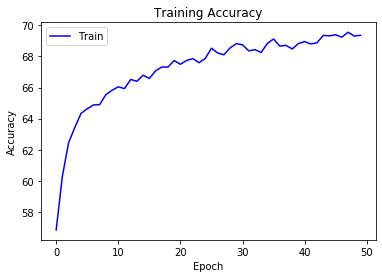

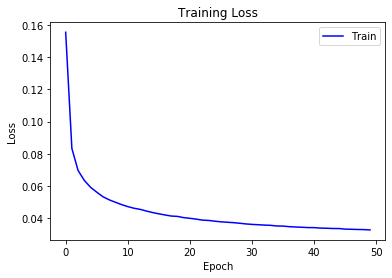

In [ ]:
def plot(acc,loss):
  # FROM ASSIGNMENT 1

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training Accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training Loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

plot(train_acc_history, train_loss_history)

### NEW MODEL - Sequential Single Input

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers

BATCH_SIZE = 64
epochs = 50

model = Sequential()

model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2))


opt = optimizers.Adam()

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['accuracy'])


In [ ]:
# train_ds = create_dataset(train_images_act, train_input, train_out)
# val_ds = create_dataset(val_images_act, val_input, val_out)
# test_ds = create_dataset(test_images_act, test_input, test_out)



LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model.fit(train_input, train_out,
          batch_size=BATCH_SIZE,
          epochs=epochs,
          verbose=1,
          validation_data=(val_input, val_out))


In [ ]:
score = model.evaluate(test_input, test_out, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.5735
Test loss: 0.4033597707748413
Test accuracy: 0.5735294222831726


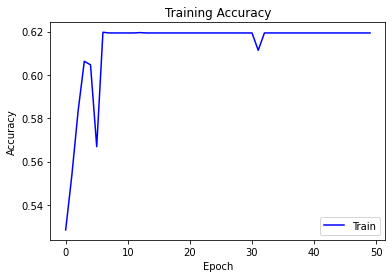

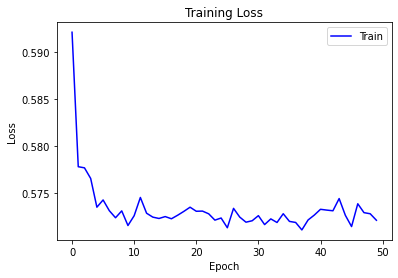

In [ ]:
def plot(history):
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  loss = history.history['loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training Accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training Loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

plot(history)